In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy


In [2]:
class Simulator:
    def __init__(self, y_init=0, grid_points=1000, t_init=0, t_end=10):
        self.t_init = t_init
        self.t_end = t_end
        self.y_init = y_init
        self.N = grid_points
        self.dt = float(t_end - t_init) / self.N

        self.ts = np.arange(t_init, t_end + self.dt, self.dt)

    def simulate(self):
        pass

    def get_ts(self):
        return copy.copy(self.ts)

In [3]:
class Euler_Maruyama_Simulator(Simulator):
    def __init__(self, funcs, y_init=0, grid_points=1000, t_init=0, t_end=10):
        self.a = funcs[0]
        self.b = funcs[1]

        super().__init__(y_init, grid_points, t_init, t_end)

    def dW(delta_t):
        return np.random.normal(scale=np.sqrt(delta_t))

    def simulate(self):
        ys = np.zeros(self.ts.size)
        ys[0] = self.y_init

        t = self.t_init
        dt = self.dt
        for i in range(1, self.ts.size):
            t = t + dt
            y = ys[i - 1]
            ys[i] = (
                y + self.a(y, t) * dt + self.b(y, t) * Euler_Maruyama_Simulator.dW(dt)
            )
        return ys


In [4]:
def simulations_viewer(num_sims, simulator, show_log=False):
    ts = simulator.get_ts()
    N = ts.shape[0]

    sims = np.ndarray((num_sims, N))
    for i in range(num_sims):
        ys = simulator.simulate()
        sims[i] = ys
        plt.plot(ts, ys)

    plt.xlabel("time (s)")
    if show_log:
        plt.yscale("log")

    h = plt.ylabel("y")
    h.set_rotation(0)
    plt.show()

    return sims


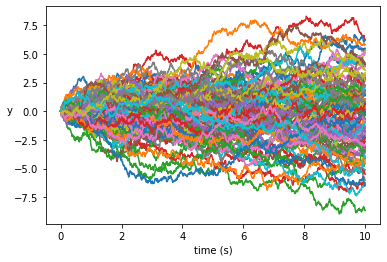

array([[ 0.        ,  0.16660085,  0.07972446, ..., -2.83297381,
        -2.59137159, -2.64367934],
       [ 0.        ,  0.02064038, -0.20655227, ..., -1.5908565 ,
        -1.39817639, -1.20748548],
       [ 0.        , -0.03847304, -0.03175347, ...,  0.85338224,
         0.8135537 ,  0.94288429],
       ...,
       [ 0.        , -0.05530786,  0.0563007 , ...,  2.09856332,
         2.15868429,  2.22251411],
       [ 0.        , -0.12232486, -0.10403377, ...,  3.7079749 ,
         3.56062366,  3.56608764],
       [ 0.        ,  0.1231564 ,  0.15881378, ..., -3.81381612,
        -3.85880673, -3.92053562]])

In [5]:
def Brownian_funcs():
    def a(y, t):
        return 0

    def b(y, t):
        return 1

    return a, b


em_brownian = Euler_Maruyama_Simulator(Brownian_funcs())
simulations_viewer(100, em_brownian)


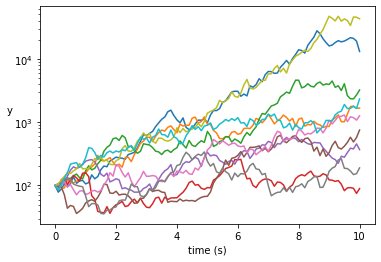

array([[  100.        ,    78.42224788,    87.51569189, ...,
        20962.8552687 , 19019.00741148, 13048.19617489],
       [  100.        ,   105.1351839 ,    90.00724867, ...,
         1790.35254142,  1648.27412496,  1669.3194684 ],
       [  100.        ,   106.57276148,   112.92718008, ...,
         2325.81248116,  2680.28684443,  3208.99036284],
       ...,
       [  100.        ,    83.46955676,   115.03908584, ...,
          148.62230624,   153.53347014,   189.11861419],
       [  100.        ,   106.95615461,   120.35954139, ...,
        45670.48051763, 45231.01064384, 42832.83214839],
       [  100.        ,    85.33475798,   101.80692189, ...,
         1774.92857532,  1644.94077244,  2320.32324926]])

In [6]:
def Geometric_Brownian_funcs(mu, sigma):
    def a(y, t):
        return mu * y

    def b(y, t):
        return sigma * y

    return a, b


em_geometirc_brownian = Euler_Maruyama_Simulator(
    Geometric_Brownian_funcs(0.5, 0.5), y_init=100, t_end=10, grid_points=100
)
simulations_viewer(10, em_geometirc_brownian, show_log=True)


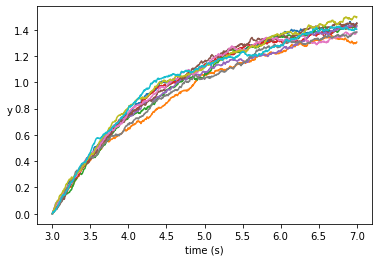

array([[0.00000000e+00, 1.20661377e-03, 2.45671516e-03, ...,
        1.44556497e+00, 1.44852953e+00, 1.44934587e+00],
       [0.00000000e+00, 8.47125728e-03, 1.49566480e-02, ...,
        1.29956462e+00, 1.30200483e+00, 1.30663269e+00],
       [0.00000000e+00, 3.18880934e-03, 1.00461229e-03, ...,
        1.43149866e+00, 1.43299931e+00, 1.43341593e+00],
       ...,
       [0.00000000e+00, 3.51212323e-03, 1.07572092e-02, ...,
        1.38211648e+00, 1.38297957e+00, 1.38194377e+00],
       [0.00000000e+00, 3.27377361e-03, 1.44911625e-02, ...,
        1.49798214e+00, 1.49244542e+00, 1.49862323e+00],
       [0.00000000e+00, 6.29592195e-03, 1.50724523e-02, ...,
        1.40724001e+00, 1.40596045e+00, 1.40512052e+00]])

In [7]:
def Ornstein_Uhlenbeck_funcs(theta, mu, sigma):
    def a(y, t):
        return theta * (mu - y)

    def b(y, t):
        return sigma

    return a, b


ornstein_unlenbeck_process = Euler_Maruyama_Simulator(
    Ornstein_Uhlenbeck_funcs(0.7, 1.5, 0.06),
    t_init=3,
    t_end=7,
    y_init=0,
    grid_points=1000,
)
simulations_viewer(10, ornstein_unlenbeck_process)


In [8]:
class Fractional_Gaussian_Simulator:
    def __init__(self, H):
        self.h = H
        self.rho = [1]

    def __generate_rho_till(self, n):
        H = 2 * self.h
        for i in range(len(self.rho), n):
            self.rho.append(((i + 1) ** H + (i - 1) ** H - 2 * (i ** H)) / 2)

    def get_cov(self, n):
        cov = np.ndarray((n, n))
        self.__generate_rho_till(n)
        for ind, r in enumerate(self.rho):
            np.fill_diagonal(cov[ind:], r)
            np.fill_diagonal(cov[:, ind:], r)
        return cov

    def simulate(self, n):
        cov = np.ndarray((n, n))
        self.__generate_rho_till(n)
        for ind, r in enumerate(self.rho):
            np.fill_diagonal(cov[ind:], r)
            np.fill_diagonal(cov[:, ind:], r)

        result = np.random.multivariate_normal(np.zeros(n), cov, check_valid="ignore")
        return result


class Fractional_Brownian_Simulator(Simulator):
    def __init__(self, H, y_init=0, grid_points=1000, t_init=0, t_end=10):
        super().__init__(y_init, grid_points, t_init, t_end)
        self.h = H
        self.factor = ((t_end - t_init) / self.N) ** H

        self.fGn = Fractional_Gaussian_Simulator(H)
        self.ts -= t_init

    def simulate(self):
        ys = self.fGn.simulate(self.N)
        ys = ys * self.factor
        ys = np.insert(ys, 0, self.y_init)
        ys = np.cumsum(ys)

        return ys
    
    def get_ts(self):
        return self.ts + self.t_init


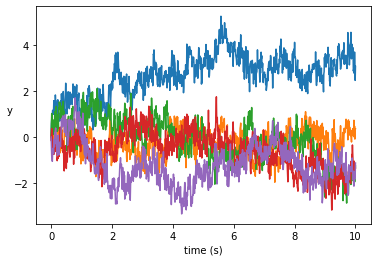

array([[ 0.        ,  0.58447781,  0.75476976, ...,  3.04348094,
         2.46234332,  3.06818272],
       [ 0.        ,  0.02656217,  0.29453245, ..., -0.08885034,
         0.31122494,  0.36072157],
       [ 0.        ,  0.54602392,  1.01896583, ..., -1.91296453,
        -1.44045755, -1.26096485],
       [ 0.        , -0.17339462,  0.36806566, ..., -1.37260351,
        -1.32916736, -1.34532247],
       [ 0.        , -0.42922356, -0.81952093, ..., -1.82563585,
        -1.70183848, -1.12892241]])

In [9]:
fBm = Fractional_Brownian_Simulator(0.2)
simulations_viewer(5, fBm)


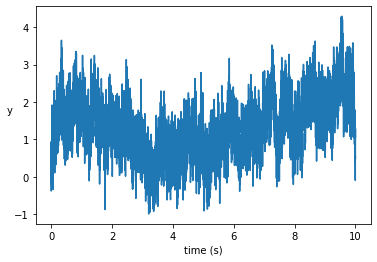

array([[ 0.        ,  0.38265648, -0.18035056, ...,  1.05601106,
         1.29005319,  1.0598235 ]])

In [12]:
fBm = Fractional_Brownian_Simulator(0.1, grid_points=10000)
simulations_viewer(1, fBm)

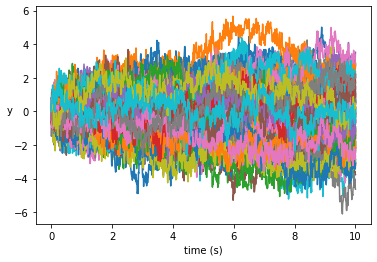

array([[ 0.        ,  0.78784417, -0.2019867 , ...,  1.57169368,
         1.556796  ,  1.3042897 ],
       [ 0.        , -0.02497909,  0.28008746, ...,  2.00606918,
         2.06839139,  2.35514578],
       [ 0.        , -0.05084106,  0.01605599, ..., -2.42768797,
        -2.5284809 , -2.16459397],
       ...,
       [ 0.        , -0.05907507,  0.43112566, ...,  2.26494059,
         1.99286875,  2.01708599],
       [ 0.        ,  0.01697558,  0.6630149 , ...,  0.3792623 ,
         0.48739171,  0.18417132],
       [ 0.        ,  0.50522927,  0.61377742, ..., -0.69720586,
        -0.5065369 ,  0.08304994]])

In [10]:
simulations_viewer(100, fBm)

Estimating Heurst Parameter

Fractional Brownian motion in a nutshell section 5 (p. 11)

In [11]:
from scipy import stats


class FBM_Heurst_Estimator:
    @staticmethod
    def get_periodogram(time_series):
        N = time_series.size
        e = np.exp(-1j * np.arange(N))

        freq = np.arange(0, N + 1) * 2 * np.pi / N

        def func(ind):
            r = np.power(e, ind)
            r = np.dot(time_series, r)
            r = np.power(np.absolute(r), 2)
            return r / (2 * np.pi * N)

        r = np.vectorize(func)(freq)
        return freq, r

    @staticmethod
    def log_pgm_method(fbm):
        fgn = fbm[1:] - fbm[:-1]
        freq, pgm = FBM_Heurst_Estimator.get_periodogram(fgn)

        lfreq = np.log(freq[1:-1])
        lpgm = np.log(pgm[1:-1])

        s, _, _, _, _ = stats.linregress(lfreq, lpgm)
        return (1 - s) / 2

    @staticmethod
    def empiric_var_method(fbm):
        N = fbm.size - 1

        vd = fbm[2:] - fbm[1:-1]
        vd = np.sum(np.power(vd, 2)) / (N - 1)

        vd2 = fbm[3:] - fbm[1:-2]
        vd2 = np.sum(np.power(vd2, 2)) / (N - 2)

        return np.log(vd2 / vd) / (2 * np.log(2))


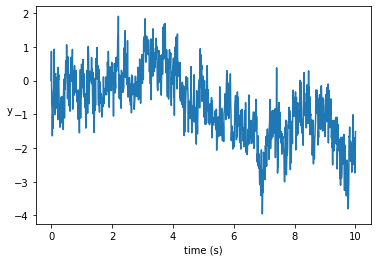

In [12]:
fBm = Fractional_Brownian_Simulator(0.1)
ys = fBm.simulate()

plt.plot(fBm.get_ts(), ys)
plt.xlabel("time (s)")
h = plt.ylabel("y")
h.set_rotation(0)
plt.show()


In [13]:
FBM_Heurst_Estimator.empiric_var_method(ys)


0.10427921860463225

Covariance Testing

ON HYPOTHESIS TESTS FOR COVARIANCE MATRICES UNDER MULTIVARIATE NORMALITY section 2.1

In [14]:
class HypTestAcceptRegion:
    def acceptRegionString(self):
        pass

    def acceptFunc(self):
        pass


def hyp_test(test_stat, acceptor, test_name=None, verbose=True):
    if verbose and test_name is not None:
        print(test_name)
    
    if acceptor.acceptFunc(test_stat):
        if verbose:
            print("Accept Null Hypothesis (H_0)")
        result = True
    else:
        if verbose:
            print("Reject Null Hypothesis, accept alternative hypothesis (H_1)")
        result = False

    if verbose:
        print(f"Test Statistics: {test_stat}")
        print(f"Accept Region: {acceptor.acceptRegionString()}")

    return result

def get_estimated_cov_matrix(X, mean=None):
    if mean == None:
        mean = np.mean(X, axis=0)
    
    n = X.shape[0]
    centralisedX = X - mean
    A = np.apply_along_axis(lambda x: np.outer(x, x), 1, centralisedX)
    A = np.sum(A, axis=0)

    return A / n

def cov_matrix_lrt_stat(X, cov0, mean=None):
    n = X.shape[0]
    A = get_estimated_cov_matrix(X) * n

    p = A.shape[0]
    cov0_inv = np.linalg.inv(cov0)

    result = -p * n
    if mean is None:
        result = (
            result
            + p * n * np.log(n)
            - n * np.log(np.linalg.det(A.dot(cov0_inv)))
            + np.trace(cov0_inv.dot(A))
        )
    else:
        est = A / n
        result = (
            result
            - n * np.log(np.linalg.det(cov0_inv.dot(est)))
            + n * np.trace(cov0_inv.dot(est))
        )

    return result


class CovMatrixLrtAcceptRegion(HypTestAcceptRegion):
    def __init__(self, sigLevel, p):
        super().__init__()
        self.sigLevel = sigLevel
        self.p = p
        self.maxAccept = stats.chi2.ppf(sigLevel, p * (p + 1) // 2)

    def acceptRegionString(self):
        return f"[0, {self.maxAccept}]"

    def acceptFunc(self, v):
        return v <= self.maxAccept


def cov_matrix_lrt_test(timeSeries, covMatrix, mean=None, sig_level=0.90, verbose=False):
    stat = cov_matrix_lrt_stat(timeSeries, covMatrix, mean=mean)
    return hyp_test(
        stat, CovMatrixLrtAcceptRegion(sig_level, p), 
        test_name="Covariance Matrix LRT",
        verbose=verbose
    )


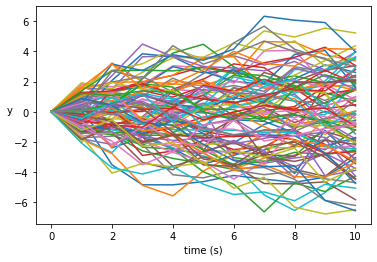

Covariance Matrix LRT
Accept Null Hypothesis (H_0)
Test Statistics: 49.36622069191594
Accept Region: [0, 82.29211682919967]


True

In [15]:
H = 0.5
sig_level = 0.99

fGn = Fractional_Gaussian_Simulator(H)
fBm = Fractional_Brownian_Simulator(H, grid_points=10)
fBms = simulations_viewer(100, fBm)

fGns = fBms[:, 1:] - fBms[:, :-1]
p = fGns.shape[1]
cov = fGn.get_cov(p) * fBm.factor ** 2

cov_matrix_lrt_test(fGns, cov, mean=np.zeros(p), sig_level=sig_level, verbose=True)


Chi Square Test for fractional gaussian noise

Given a sample path fraction gaussian noise $X$, \
$H_0: \text{Heurst parameter} = H$ \
$H_1: \text{Heurst parameter} \neq H$

Thesis 3.2.2

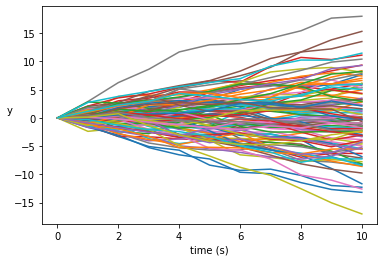

Accepted 91 out of 100 tests


In [16]:
class FGnChiSquareAcceptRegion(HypTestAcceptRegion):
    def __init__(self, sigLevel, N):
        super().__init__()
        self.sigLevel = sigLevel
        self.N = N
        self.maxAccept = stats.chi2.ppf(sigLevel, N)

    def acceptRegionString(self):
        return f"[0, {self.maxAccept}]"
    
    def acceptFunc(self, v):
        return v <= self.maxAccept

def fGn_heurst_chi2_test(H, time_series, factor, sig_level=0.90, verbose=False):
    fGn = Fractional_Gaussian_Simulator(H)
    cov = fGn.get_cov(time_series.size) * factor ** 2
    L = np.linalg.cholesky(cov)
    L_inv = np.linalg.inv(L)

    Z = np.dot(L_inv, time_series)
    stat = np.sum(np.power(Z, 2))
    return hyp_test(
        stat, FGnChiSquareAcceptRegion(sig_level, time_series.size), 
        test_name="Fractional Gaussian Noise Chi Square Test",
        verbose=verbose
    )

def fBm_heurst_chi2_test(H, time_series, factor, sig_level=0.90, verbose=False):
    fGn = time_series[1:] - time_series[:-1]
    return fGn_heurst_chi2_test(H, fGn, factor, sig_level=sig_level, verbose=verbose)

H = 0.75
total_sim= 100

fBm = Fractional_Brownian_Simulator(H, grid_points=10)
fBms = simulations_viewer(total_sim, fBm)

hypothesisH = 0.75
sig_level = 0.90

accept_count = 0

for ts in fBms:
    r = fBm_heurst_chi2_test(hypothesisH, ts, fBm.factor, sig_level=sig_level, verbose=False)
    accept_count += (1 if r else 0)

print(f"Accepted {accept_count} out of {total_sim} tests")



$$
B_H(t) = \int^t_0 K_H(t, s) dB(s)
$$
where
$$
K_H(t, s) = \frac{(t-s)^{H-\frac{1}{2}}}{\Gamma(H+\frac{1}{2})}(_2F_1(H-\frac{1}{2};\frac{1}{2} - H; H+\frac{1}{2}; 1-\frac{t}{s}))
$$

It can be approximated as:
$$
B_H(t_j) = \frac{n}{T}\sum^{j-1}_{i=0}(\int^{t_{i+1}}_{t_{i}}(K_H(t_j, s)ds) \delta B_i)
$$

In [17]:
import scipy.special as sc
import scipy.integrate as sc_int

class FractionalBrownianSimulator2(Simulator):
    def __init__(self, H, y_init=0, grid_points=1000, t_init=0, t_end=10):
        super().__init__(y_init, grid_points, t_init, t_end)
        self.h = H
        self.factor = ((t_end - t_init) / self.N) ** H

        self.fGn = Fractional_Gaussian_Simulator(H)
        self.ts -= t_init

    @staticmethod
    def K_H(t, s, H):
        result = sc.hyp2f1(H-0.5, 0.5-H, H+0.5, 1-t/s)
        result *= (t-s)**(H-0.5)
        result /= sc.gamma(H+0.5)

        return result
    
    @staticmethod
    def __integral_help(t_from, t_end, t, H):
        f = lambda s : FractionalBrownianSimulator2.K_H(t, s, H)
        return sc_int.quadrature(f, t_from, t_end)[0]

    @staticmethod
    def __get_tj(ts, brownian, j, H, n, T):
        if j == 0:
            return 0

        r = np.ndarray(j)
        for i, a, b in zip(range(j), ts[:j], ts[1:j+1]):
            r[i] = FractionalBrownianSimulator2.__integral_help(
                a, b, ts[j], H
            )
            
        r = r.dot(brownian[:j]) * n / T

        return r

    def simulate(self):
        n = self.N + 1
        T = self.t_end - self.t_init
        brownian = np.random.normal(size=n) * np.sqrt(T / n)
        
        ys = np.ndarray(self.ts.size)

        for j in range(ys.size):
            ys[j] = FractionalBrownianSimulator2.__get_tj(
                        self.ts, brownian, j, self.h, n, T
                    )
        return ys

    def get_ts(self):
        return self.ts + self.t_init
    
    

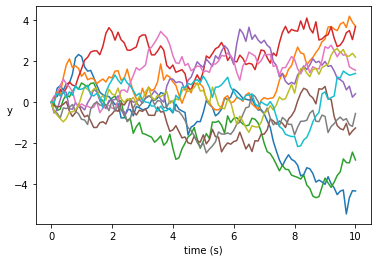

In [18]:
H = 0.5

fBm = FractionalBrownianSimulator2(H, grid_points=100)
fBms = simulations_viewer(10, fBm)